In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
print(df["Undergrad"].value_counts())
print(df["Marital.Status"].value_counts())
print(df["Urban"].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


<Axes: >

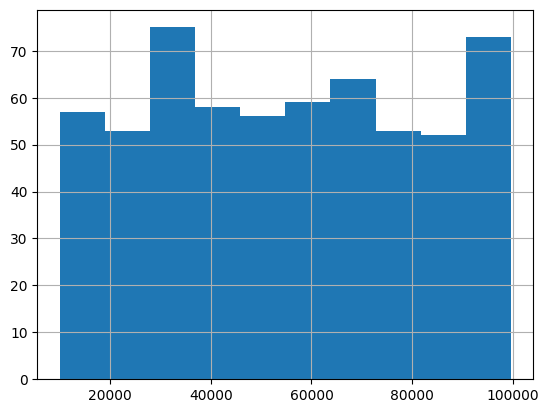

In [5]:
df["Taxable.Income"].hist()

In [6]:
X= df.drop("Taxable.Income", axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [7]:
# Coverting Catagorical data using map
X["Undergrad"] = X["Undergrad"].map({"NO": 0, "YES":1})
X["Marital.Status"] = X["Marital.Status"].map({"Single": 0, "Married":1, "Divorced":2})
X["Urban"] = X["Urban"].map({"NO": 0, "YES":1})

In [8]:
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0


In [10]:
X.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
y= pd.cut(df["Taxable.Income"], bins=[0, 30000 , 100000] , labels=["Risky", "Good"])
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [12]:
y.value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=500, random_state=42, max_features="auto")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7555555555555555

In [15]:
confusion_matrix(y_test, y_pred)

array([[136,   7],
       [ 37,   0]])

# Using SMOTE Resampling

In [16]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [17]:
resample = SMOTE()
x_resampled, y_resampled = resample.fit_resample(X,y)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [19]:
model = RandomForestClassifier(n_estimators=200, random_state=42, max_features="auto")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6923076923076923

In [20]:
confusion_matrix(y_test, y_pred)

array([[ 98,  48],
       [ 40, 100]])

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.71      0.67      0.69       146
       Risky       0.68      0.71      0.69       140

    accuracy                           0.69       286
   macro avg       0.69      0.69      0.69       286
weighted avg       0.69      0.69      0.69       286



# Using Randomover sampler Resampling

In [22]:
resample = RandomOverSampler()
x_resampled, y_resampled = resample.fit_resample(X,y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [24]:
model = RandomForestClassifier(n_estimators=200, random_state=42, max_features="auto")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8636363636363636

In [25]:
confusion_matrix(y_test, y_pred)

array([[110,  36],
       [  3, 137]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.97      0.75      0.85       146
       Risky       0.79      0.98      0.88       140

    accuracy                           0.86       286
   macro avg       0.88      0.87      0.86       286
weighted avg       0.88      0.86      0.86       286

